In [1]:
# import library
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

from operator import attrgetter

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [8]:
# Read CSV

df=pd.read_csv('session_5_cohort_analysis.csv',
              dtype={'CustomerID':str,
                    'InvoiceNo':str},
              parse_dates=['InvoiceDate']) #kolom invoiceDate terbaca sebagai data tanggal

print(df.shape)
df.head()

(499428, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [4]:
# df.info()

# Data Preprocessing
Kita akan mentransdormasi data di atas untuk mengekstrak 4 informasi yang diperlukan dalam _cohort analysis_:  
* **Cohort Date**: tanggal aktivitas pertama dari user
* **Current Activity Date**: tanggal aktivitas selanjutnya dari user
* **Total Distinct Subject**: Total user dikelompokkan berdasarkan cohort date dan current date
* **Period Distance**: perbedaan waktu antara current activity date dan cohort date

In [13]:
#Cohort date (per month)
# Kita mengambil cohort date dengan mencari tanggal minimum dari invoice tiap user
# data tersebut kita ubah dalam format tahun-bulan

df['cohort_month']=df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [15]:
#Current activity date: diambil dari tanggal invoice, diubah formatnya menjadi tahun-bulan
df['current_month']=df['InvoiceDate'].dt.to_period('M')

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cohort_month,current_month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01,2011-01
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01,2011-01
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01,2011-01
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01,2011-01
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01,2011-01


In [19]:
# total distinct user: total user per bulan berdasarkan cohort month
df_cohort=df.groupby(['cohort_month','current_month']).agg(n_customer=('CustomerID','nunique')).reset_index()
df_cohort.head()

,cohort_month,current_month,n_customer
0,2011-01,2011-01,783
1,2011-01,2011-02,299
2,2011-01,2011-03,346
3,2011-01,2011-04,305
4,2011-01,2011-05,359


In [25]:
# period: perbedaan waktu antara current month dan cohort month

df_cohort['period']=(df_cohort['current_month']-df_cohort['cohort_month']).apply(attrgetter('n')) 
#attrgetter untuk megambil angka saja tanpa atribut bulan
df_cohort.head()

,cohort_month,current_month,n_customer,period
0,2011-01,2011-01,783,0
1,2011-01,2011-02,299,1
2,2011-01,2011-03,346,2
3,2011-01,2011-04,305,3
4,2011-01,2011-05,359,4


# Creating Heatmap

In [27]:
# kita sudah mendapatkan semua data yang diperlukan
# sekarang, df_cohort kita ubah bentuknya menjadi pivot tabel dengan 
# index: cohort month
# kolom: period
# values: n_customer

cohort_pivot=df_cohort.pivot_table(index='cohort_month', columns='period',values='n_customer')
cohort_pivot

period,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2011-01,783.0,299.0,346.0,305.0,359.0,339.0,314.0,311.0,347.0,340.0,413.0,224.0
2011-02,499.0,144.0,125.0,169.0,158.0,139.0,152.0,169.0,157.0,184.0,74.0,NaN
2011-03,530.0,109.0,144.0,128.0,123.0,104.0,151.0,131.0,165.0,57.0,NaN,NaN
2011-04,360.0,90.0,90.0,86.0,78.0,88.0,90.0,105.0,33.0,NaN,NaN,NaN
2011-05,317.0,73.0,57.0,58.0,73.0,80.0,87.0,34.0,NaN,NaN,NaN,NaN
2011-06,263.0,56.0,48.0,67.0,63.0,89.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-07,218.0,45.0,47.0,53.0,58.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,184.0,47.0,47.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,313.0,93.0,104.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cohort_pivot.iloc[:,0] # jumlah data di period 0
cohort_percentage=cohort_pivot.divide(cohort_pivot.iloc[:,0],axis=0)
cohort_percentage

period,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2011-01,1.0,0.381865,0.441890,0.389527,0.458493,0.432950,0.401022,0.397190,0.443167,0.434227,0.527458,0.286079
2011-02,1.0,0.288577,0.250501,0.338677,0.316633,0.278557,0.304609,0.338677,0.314629,0.368737,0.148297,NaN
2011-03,1.0,0.205660,0.271698,0.241509,0.232075,0.196226,0.284906,0.247170,0.311321,0.107547,NaN,NaN
2011-04,1.0,0.250000,0.250000,0.238889,0.216667,0.244444,0.250000,0.291667,0.091667,NaN,NaN,NaN
2011-05,1.0,0.230284,0.179811,0.182965,0.230284,0.252366,0.274448,0.107256,NaN,NaN,NaN,NaN
2011-06,1.0,0.212928,0.182510,0.254753,0.239544,0.338403,0.102662,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.206422,0.215596,0.243119,0.266055,0.137615,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.255435,0.255435,0.260870,0.146739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,1.0,0.297125,0.332268,0.124601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


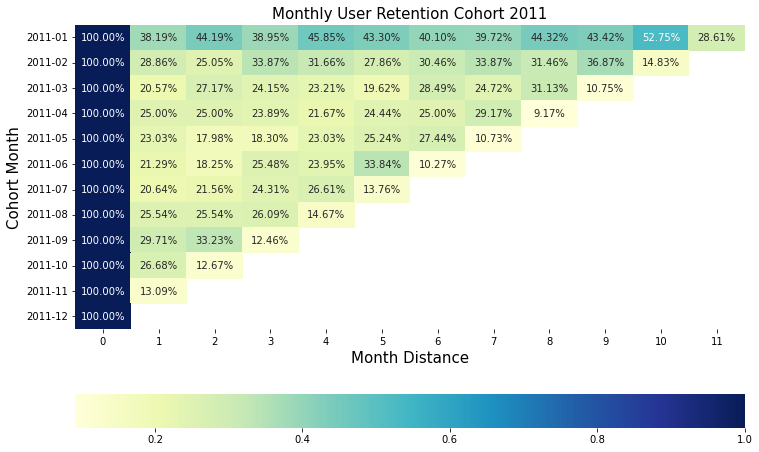

In [35]:
plt.figure(figsize=(12,8))

sns.heatmap(cohort_percentage,
           annot=True,
           cmap='YlGnBu',
           fmt='.2%', #format penulisan dalam persen
           cbar_kws={'orientation':'horizontal'}) #bentuk tiap bagian jadi persegi panjang horizontal
plt.xlabel('Month Distance', size=15)
plt.ylabel('Cohort Month',size=15)
plt.title('Monthly User Retention Cohort 2011', size=15)
plt.show()

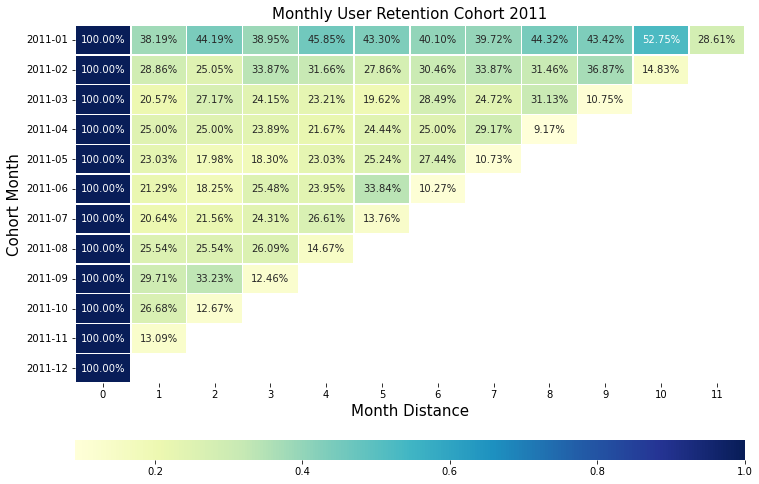

In [40]:
# artist layer
#create canvas
grid_kws={'height_ratios':(.9,.05),'hspace':.3}
f,(ax,cbar_ax)=plt.subplots(2,gridspec_kw=grid_kws, figsize=(12,8))

#create heatmap

ax=sns.heatmap(cohort_percentage,
              ax=ax,
              cbar_ax=cbar_ax,
              annot=True,
              fmt='.2%',
              linewidths=.5,
              cbar_kws={'orientation':'horizontal'},
              cmap='YlGnBu')
ax.set_title('Monthly User Retention Cohort 2011', size=15)
ax.set_xlabel('Month Distance', size=15)
ax.set_ylabel('Cohort Month',size=15)
plt.show()

# Creating Lineplot

In [41]:
df_cohort

,cohort_month,current_month,n_customer,period
0,2011-01,2011-01,783,0
1,2011-01,2011-02,299,1
2,2011-01,2011-03,346,2
3,2011-01,2011-04,305,3
4,2011-01,2011-05,359,4
...,...,...,...,...
73,2011-10,2011-11,99,1
74,2011-10,2011-12,47,2
75,2011-11,2011-11,359,0
76,2011-11,2011-12,47,1


In [42]:
## Preprocessing: kita mau data berupa percentage user per cohort month per current month

df_lineplot=df_cohort.copy()
df_lineplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   cohort_month   78 non-null     period[M]
 1   current_month  78 non-null     period[M]
 2   n_customer     78 non-null     int64    
 3   period         78 non-null     int64    
dtypes: int64(2), period[M](2)
memory usage: 2.6 KB


In [43]:
# data period[M] membuat output di label axis menjadi aneh, kita ubah dulu menajdi string
df_lineplot['cohort_month']=df_lineplot['cohort_month'].astype(str)
df_lineplot['current_month']=df_lineplot['current_month'].astype(str)
df_lineplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cohort_month   78 non-null     object
 1   current_month  78 non-null     object
 2   n_customer     78 non-null     int64 
 3   period         78 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB


In [46]:
df_plot=df_lineplot.groupby('cohort_month').agg({'n_customer':'max'}) # jumlah max customer di tiap cohort month
df_plot

,n_customer
cohort_month,
2011-01,783
2011-02,499
2011-03,530
2011-04,360
2011-05,317
2011-06,263
2011-07,218
2011-08,184
2011-09,313


In [51]:
df_plot=df_lineplot.set_index('cohort_month').div(df_plot,level='cohort_month')*100 #cari persentase customer tiap bulannya
df_plot

,current_month,n_customer,period
cohort_month,,,
2011-01,NaN,100.000000,NaN
2011-01,NaN,38.186462,NaN
2011-01,NaN,44.189017,NaN
2011-01,NaN,38.952746,NaN
2011-01,NaN,45.849298,NaN
...,...,...,...
2011-10,NaN,26.684636,NaN
2011-10,NaN,12.668464,NaN
2011-11,NaN,100.000000,NaN


In [55]:
df_plot=df_plot.reset_index()[['cohort_month', 'n_customer']].rename(columns={'n_customer':'percentage_customer'}) 
#diindex ulang dan diganti nama kolom
df_plot

,cohort_month,percentage_customer
0,2011-01,100.000000
1,2011-01,38.186462
2,2011-01,44.189017
3,2011-01,38.952746
4,2011-01,45.849298
...,...,...
73,2011-10,26.684636
74,2011-10,12.668464
75,2011-11,100.000000
76,2011-11,13.091922


In [56]:
df_plot['current_month']=df_lineplot['current_month']
df_plot['period']=df_lineplot['period']
df_plot

,cohort_month,percentage_customer,current_month,period
0,2011-01,100.000000,2011-01,0
1,2011-01,38.186462,2011-02,1
2,2011-01,44.189017,2011-03,2
3,2011-01,38.952746,2011-04,3
4,2011-01,45.849298,2011-05,4
...,...,...,...,...
73,2011-10,26.684636,2011-11,1
74,2011-10,12.668464,2011-12,2
75,2011-11,100.000000,2011-11,0
76,2011-11,13.091922,2011-12,1


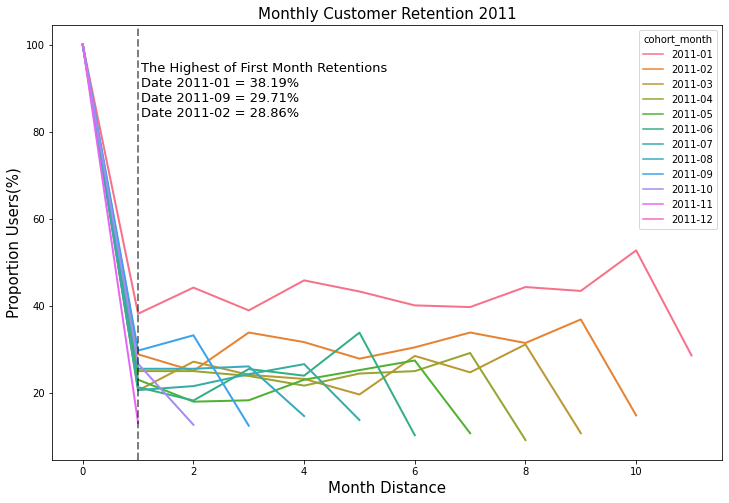

In [74]:
# # build lineplot
plt.figure(figsize=(12,8))

sns.lineplot(data=df_plot,
            x='period',
            y='percentage_customer',
            hue='cohort_month',
            dashes= True,
            linewidth=2,
            palette='husl')
plt.title('Monthly Customer Retention 2011', size=15)
plt.xlabel('Month Distance', size=15)
plt.ylabel('Proportion Users(%)', size=15)

#optional: tambah garis pembatas untuk menunjukkan 3 retensi terbaik di bulan pertama
top3=df_plot[df_plot['period']==1].sort_values('percentage_customer',ascending=False).iloc[:3]
top3_name=top3['cohort_month'].to_list()
top3_value=top3['percentage_customer'].apply(lambda x: round(x,2)).to_list()

#informasi yang ingin ditulis
text_plot=f'''
The Highest of First Month Retentions
Date {top3_name[0]} = {top3_value[0]}%
Date {top3_name[1]} = {top3_value[1]}%
Date {top3_name[2]} = {top3_value[2]}%
'''

plt.axvline(x=1, linestyle='--', color='black', lw=2, alpha=.5) #garis vertikal di bulan pertama
plt.text(1.05,80,text_plot, fontsize=13) #masukkan text

plt.show()